In [1]:
# copy template to $(jupyter --data-dir)/nbextensions/snippets/snippets.json
from logging import basicConfig
from pathlib import Path
import warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

from IPython.core.display import HTML
from IPython.display import display, clear_output

warnings.filterwarnings('ignore')

display(
    HTML(
         """
          <style type="text/css">
          table.dataframe td, table.dataframe th {
              border: 1px  black solid !important;
              color: black !important;
          }
          </style>
         <style>.container { width:100% !important; }</style>
         """
    )
)

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 100
sns.set()

pd.options.mode.chained_assignment = None
pd.options.display.max_columns =  None
pd.options.display.precision = 2

np.set_printoptions(precision=3, linewidth=200, suppress=True)

basicConfig(level='INFO', format='%(asctime)s %(levelname)s %(message)s', datefmt='%d/%m/%Y %H:%M:%S%z')
LOGGER = getLogger(__name__)

CACHE = {}

In [2]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph

In [3]:
from micrograd.engine import Value

In [4]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.parents:
                edges.add((child, v))
                build(child)

    build(root)
    
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    
    nodes, edges = trace(root)
    
    dot = Digraph(format=format,
                  graph_attr={'rankdir': rankdir})  #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(n.id),
                 label="{ data %.2f | grad %.2f }" % (n.data, n.grad),
                 shape='record')
        if n.ops:
            dot.node(name=str(n.id) + n.ops, label=n.ops)
            dot.edge(str(n.id) + n.ops, str(n.id))

    for n1, n2 in edges:
        dot.edge(str(n1.id), str(n2.id) + n2.ops)

    return dot

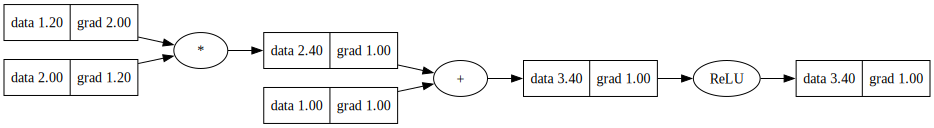

In [5]:
# a very simple example
x = Value(1.2)
z = 2 * x + 1
y = z.relu()
y.backward()
draw_dot(y)

In [6]:
# a simple 2D neuron
import random
from micrograd import nn

[Value(data=0.236, grad=0), Value(data=0.067, grad=0)]


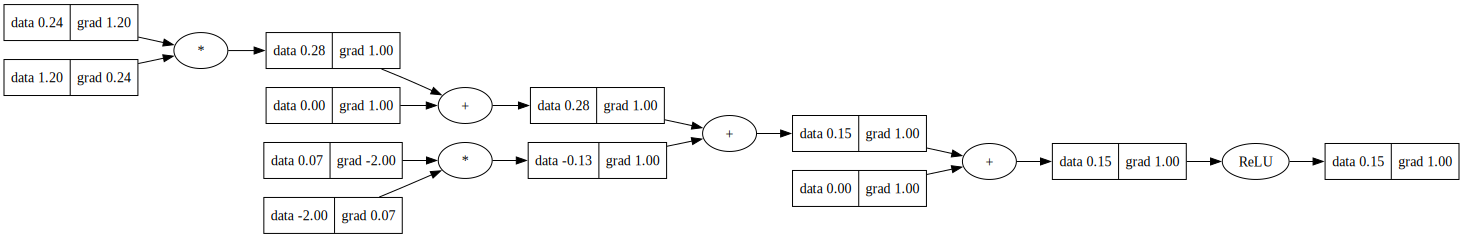

In [13]:
random.seed(1337)

n = nn.Neuron(2)
print(n.w)
x = [1.2, -2]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

In [8]:
# dot.render('gout')